In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='grade3') 
from Function import get_tril_vec

# define data repository
data_dir = 'high_low'
results_dir = 'new_res'

# ISRSA

In [13]:
%matplotlib inline
import os
import mne
import pandas as pd
import numpy as np
from neurora.stuff import permutation_corr
from mne.viz import plot_topomap
from mne.stats import fdr_correction
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='grade3') 
from Function import spearmanr, permutation_cor

# Define the path
eeg_path = 'Scripts2Keyu/EEG/Results/0_ISC/EEG/'
behav_path = 'new_res/'
results_path = 'ISRSA/EEG/1_side/ax'
figure_path = 'ISRSA/EEG'

In [14]:
# Use the mne.read_epochs_eeglab() to read the preprocessed data
demo = mne.read_epochs_eeglab('Scripts2Keyu/EEG/Angry/ag1/sub_001_ag1.set')
montage = mne.channels.read_custom_montage('Scripts2Keyu/EEG/Emotion.loc')
demo.set_montage(montage)

# Obtain channel & montage information for topo-plot
topo_info = demo.info
# Obtain the channel names as a list
ch_names = demo.ch_names
# Crate a index list for channels
ch_idx = list(range(63))
# Combine the channels and index and convert to a dict
ch = dict(zip(ch_names, ch_idx))

Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Angry/ag1/sub_001_ag1.set...
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1824554407.py:2: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  demo = mne.read_epochs_eeglab('Scripts2Keyu/EEG/Angry/ag1/sub_001_ag1.set')


In [15]:
print(ch['TP8'])

56


In [16]:
ax_psd = np.load(os.path.join(eeg_path, 'ax_isc_matrix.npy'), allow_pickle=True).item()['matrix']

In [17]:
behav_simi = np.load(os.path.join(behav_path, 'behavisc_annak.npy'), allow_pickle=True).item()
print(behav_simi)

{'ar_pe_low': array([0.48484848, 0.83333333, 0.6969697 , 0.56060606, 0.46969697,
       0.78787879, 0.95454545, 0.74242424, 0.92424242, 0.64393939,
       0.71212121, 0.60606061, 0.75757576, 0.8030303 , 0.93939394,
       0.64393939, 0.53030303, 0.87878788, 0.54545455, 0.68181818,
       0.5       , 0.85606061, 0.62121212, 0.81818182, 0.89393939,
       0.85606061, 0.57575758, 0.77272727, 0.66666667, 0.59090909,
       0.72727273, 0.51515152, 0.40909091, 0.27272727, 0.13636364,
       0.04545455, 0.36363636, 0.53030303, 0.31818182, 0.5       ,
       0.21969697, 0.28787879, 0.18181818, 0.33333333, 0.37878788,
       0.51515152, 0.21969697, 0.10606061, 0.45454545, 0.12121212,
       0.25757576, 0.07575758, 0.43181818, 0.1969697 , 0.39393939,
       0.46969697, 0.43181818, 0.15151515, 0.34848485, 0.24242424,
       0.16666667, 0.3030303 , 0.09090909, 0.62121212, 0.48484848,
       0.39393939, 0.71212121, 0.87878788, 0.66666667, 0.84848485,
       0.56818182, 0.63636364, 0.53030303, 0.681

In [18]:
def get_fdr(isrsa_matrix):  
    _,delta_cor = fdr_correction(isrsa_matrix['delta_p'], alpha=0.05, method='indep')
    _,theta_cor = fdr_correction(isrsa_matrix['theta_p'], alpha=0.05, method='indep')
    _,alpha_cor = fdr_correction(isrsa_matrix['alpha_p'], alpha=0.05, method='indep')
    _,beta_cor = fdr_correction(isrsa_matrix['beta_p'], alpha=0.05, method='indep')
    _,gamma_cor = fdr_correction(isrsa_matrix['gamma_p'], alpha=0.05, method='indep')
    isrsa_matrix.insert(4, 'delta_p_cor', delta_cor)
    isrsa_matrix.insert(7, 'theta_p_cor', theta_cor)
    isrsa_matrix.insert(10, 'alpha_p_cor', alpha_cor)
    isrsa_matrix.insert(13, 'beta_p_cor', beta_cor)
    isrsa_matrix.insert(15, 'gamma_p_cor', gamma_cor)
    return isrsa_matrix

In [19]:
def isrsa(psd_simi, behav_simi,ch_names):
    delta_r,delta_p, theta_r, theta_p, alpha_r, alpha_p, beta_r, beta_p, gamma_r, gamma_p  = [], [], [], [], [], [], [], [], [], []

    for ch in ch_idx:
        r = spearmanr(psd_simi[:,ch,0], behav_simi)
        p = permutation_corr(psd_simi[:,ch,0], behav_simi, method='spearman', iter=10000)
        delta_r.append(r)
        delta_p.append(p)
        
        r = spearmanr(psd_simi[:,ch,1], behav_simi)
        p = permutation_corr(psd_simi[:,ch,1], behav_simi, method='spearman', iter=10000)
        theta_r.append(r)
        theta_p.append(p)
        
        r = spearmanr(psd_simi[:,ch,2], behav_simi)
        p = permutation_corr(psd_simi[:,ch,2], behav_simi, method='spearman', iter=10000)
        alpha_r.append(r)
        alpha_p.append(p)
        
        r = spearmanr(psd_simi[:,ch,3], behav_simi)
        p = permutation_corr(psd_simi[:,ch,3], behav_simi, method='spearman', iter=10000)
        beta_r.append(r)
        beta_p.append(p)
        
        r = spearmanr(psd_simi[:,ch,4], behav_simi)
        p = permutation_corr(psd_simi[:,ch,4], behav_simi, method='spearman', iter=10000)
        gamma_r.append(r)
        gamma_p.append(p)

    isrsa_df = {'channel_name': ch_names, 'delta_r':delta_r, 'delta_p':delta_p, 'theta_r':theta_r, 'theta_p':theta_p, 'alpha_r':alpha_r, \
        'alpha_p':alpha_p, 'beta_r': beta_r, 'beta_p': beta_p, 'gamma_r': gamma_r, 'gamma_p': gamma_p}
    isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')

    return isrsa_df


In [20]:
def isrsa_topo(isrsa_matrix,topo_info,vmin,vmax,title):
    fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(25,15))

    mask = obtain_mask(isrsa_matrix['delta_p'], ch_idx)
    im,_ = plot_topomap(isrsa_matrix['delta_r'], topo_info, axes=ax1, show=False, mask=mask, mask_params=dict(marker='o',markersize=6, markerfacecolor='w'), vmin=vmin, vmax=vmax,cmap='RdBu_r',sphere=0.13)
    mask = obtain_mask(isrsa_matrix['theta_p'], ch_idx)
    im,_ = plot_topomap(isrsa_matrix['theta_r'], topo_info, axes=ax2, show=False, mask=mask, mask_params=dict(marker='o',markersize=6, markerfacecolor='w'), vmin=vmin, vmax=vmax,  cmap='RdBu_r',sphere=0.13)
    mask = obtain_mask(isrsa_matrix['alpha_p'], ch_idx)    
    im,_ = plot_topomap(isrsa_matrix['alpha_r'], topo_info, axes=ax3, show=False, mask=mask, mask_params=dict(marker='o',markersize=6, markerfacecolor='w'), vmin=vmin, vmax=vmax,  cmap='RdBu_r',sphere=0.13)
    mask = obtain_mask(isrsa_matrix['beta_p'], ch_idx)    
    im,_ = plot_topomap(isrsa_matrix['beta_r'], topo_info, axes=ax4, show=False, mask=mask, mask_params=dict(marker='o',markersize=6, markerfacecolor='w'), vmin=vmin, vmax=vmax, cmap='RdBu_r',sphere=0.13)
    mask = obtain_mask(isrsa_matrix['gamma_p'], ch_idx)    
    im,_ = plot_topomap(isrsa_matrix['gamma_r'], topo_info, axes=ax5, show=False, mask=mask, mask_params=dict(marker='o',markersize=6, markerfacecolor='w'), vmin=vmin, vmax=vmax, cmap='RdBu_r',sphere=0.13)

    ax1.set_title('Delta',fontsize=20) 
    ax2.set_title('Theta',fontsize=20) 
    ax3.set_title('Alpha',fontsize=20) 
    ax4.set_title('Beta',fontsize=20) 
    ax5.set_title('Gamma',fontsize=20) 
    ax_x_start, ax_x_width, ax_y_start, ax_y_height  = 0.95, 0.02, 0.4, 0.3
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    fig.suptitle(title, x=0.5, y=0.75, fontsize=25, fontweight='bold')
    plt.show()
    #plt.savefig('F:/1_Emotion_Data/Results/2_Plots/ISRSA/ag_so.png',bbox_inches='tight',dpi=600,pad_inches=0.1)
    # plt.close()
    return fig

In [21]:
# Obtain mask
def obtain_mask(p_vector, ch_idx):  
    tp = np.array(p_vector)
    for i in ch_idx: 
        p = tp[i]
        if p <= 0.05:
            tp[i] = True
        else:
            tp[i] = False
    return tp

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


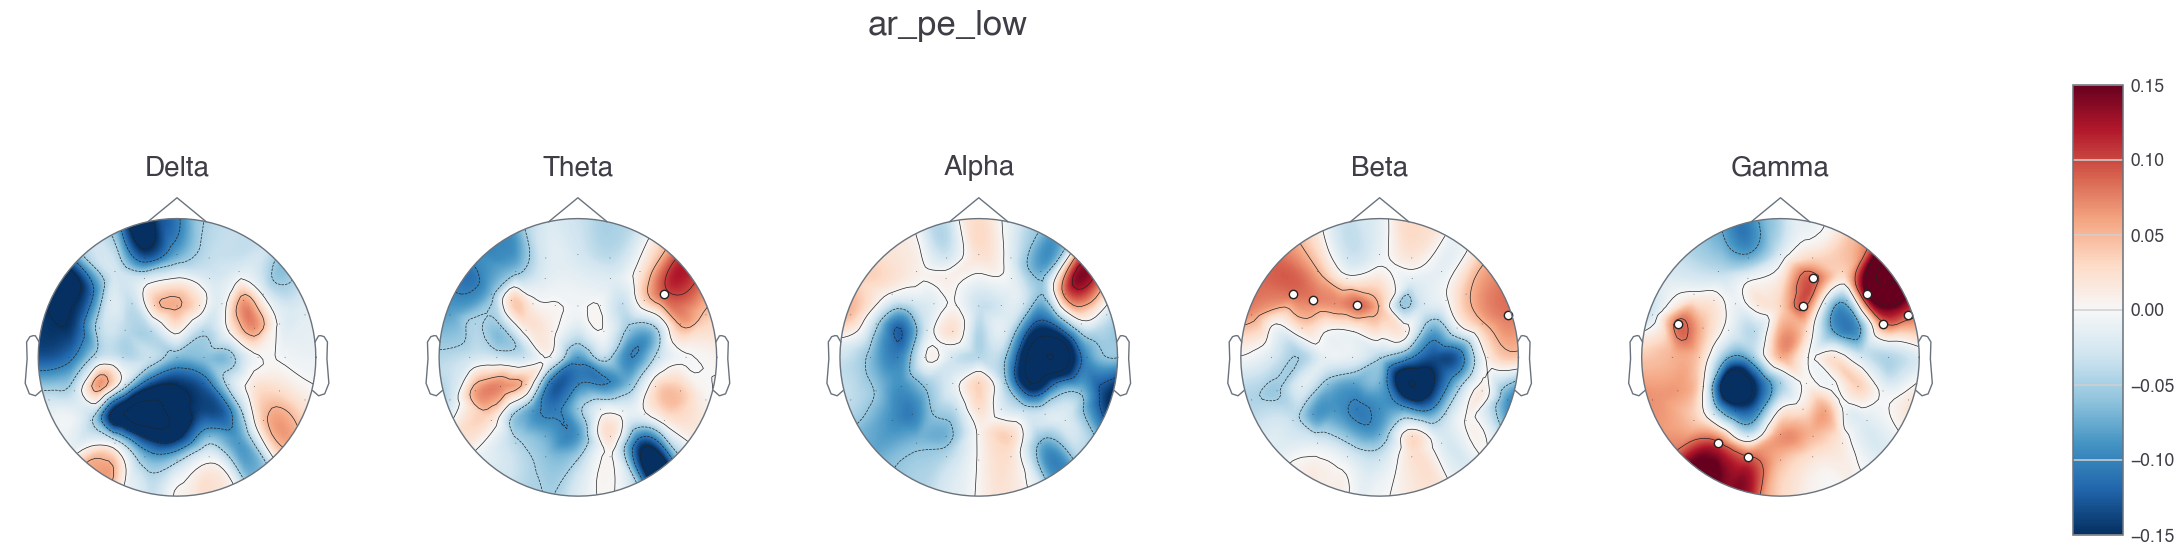

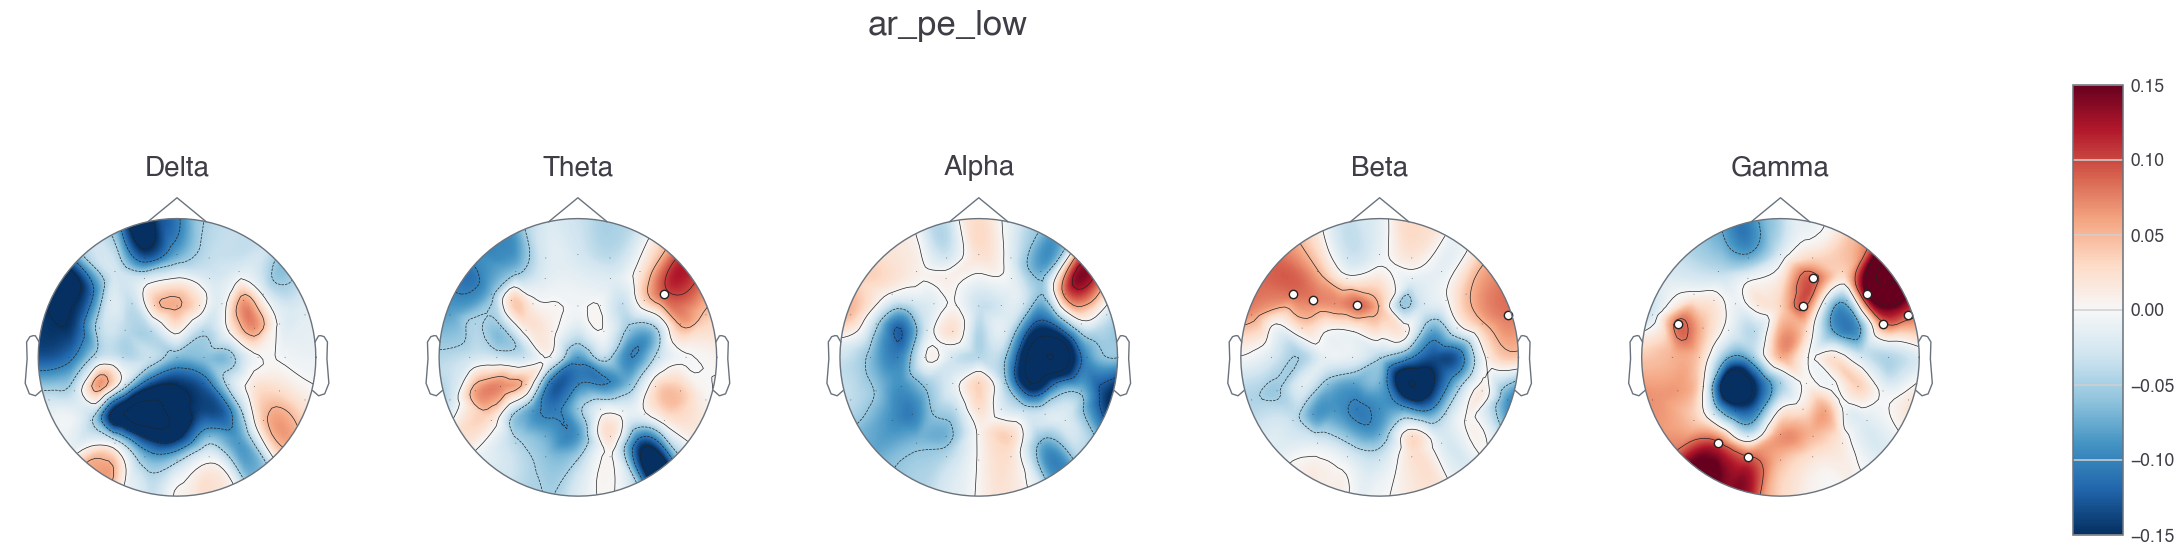

In [23]:
ar_pe_low = isrsa(ax_psd, behav_simi['ar_pe_low'], ch_names)
ar_pe_low.to_csv(os.path.join(results_path, 'ar_pe_low_isrsa.csv'))
isrsa_topo(ar_pe_low,topo_info,vmin=-0.15,vmax=0.15, title='ar_pe_low')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


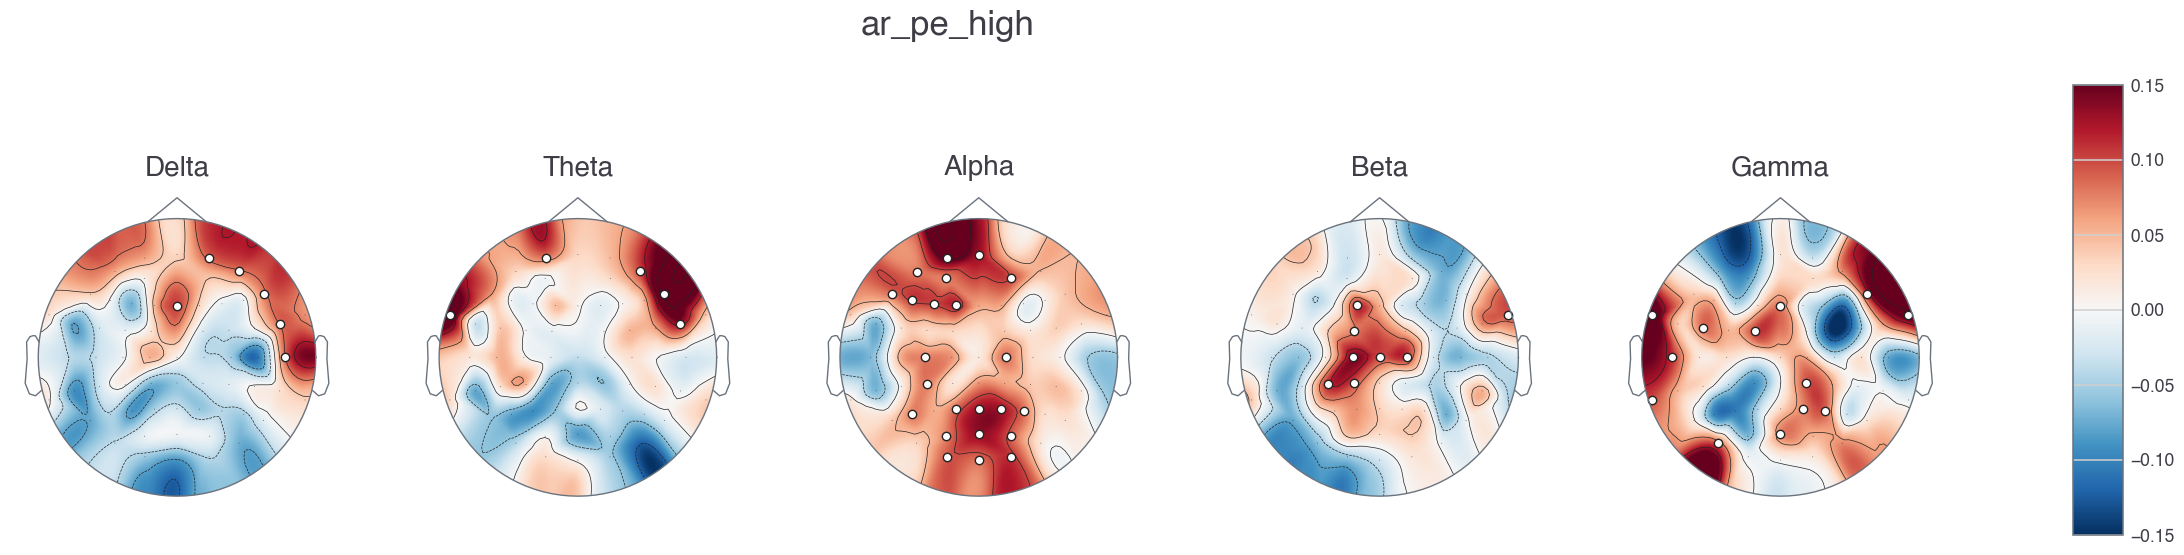

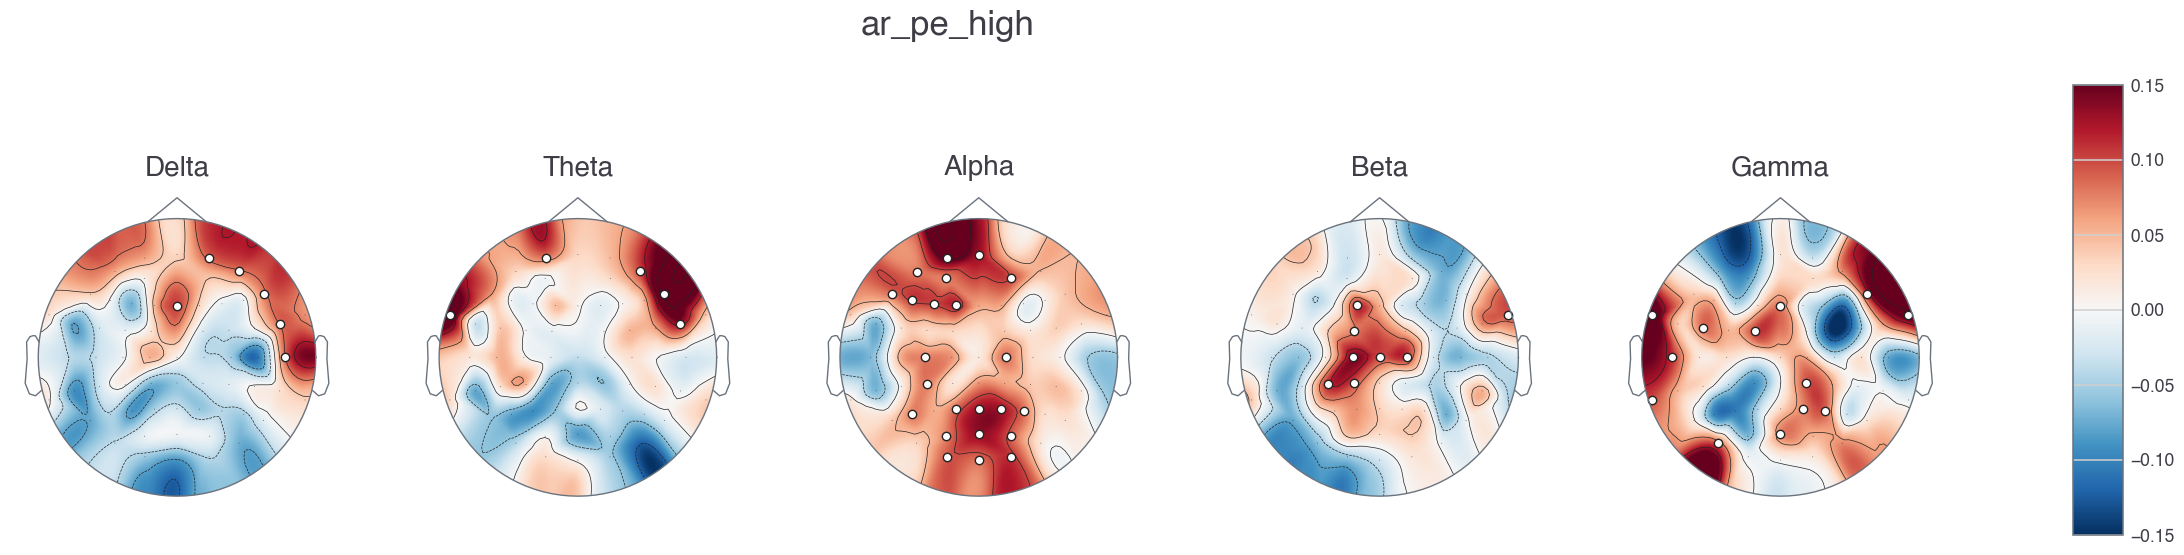

In [24]:
ar_pe_high = isrsa(ax_psd, behav_simi['ar_pe_high'], ch_names)
ar_pe_high.to_csv(os.path.join(results_path, 'ar_pe_high_isrsa.csv'))
isrsa_topo(ar_pe_high,topo_info,vmin=-0.15,vmax=0.15, title='ar_pe_high')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


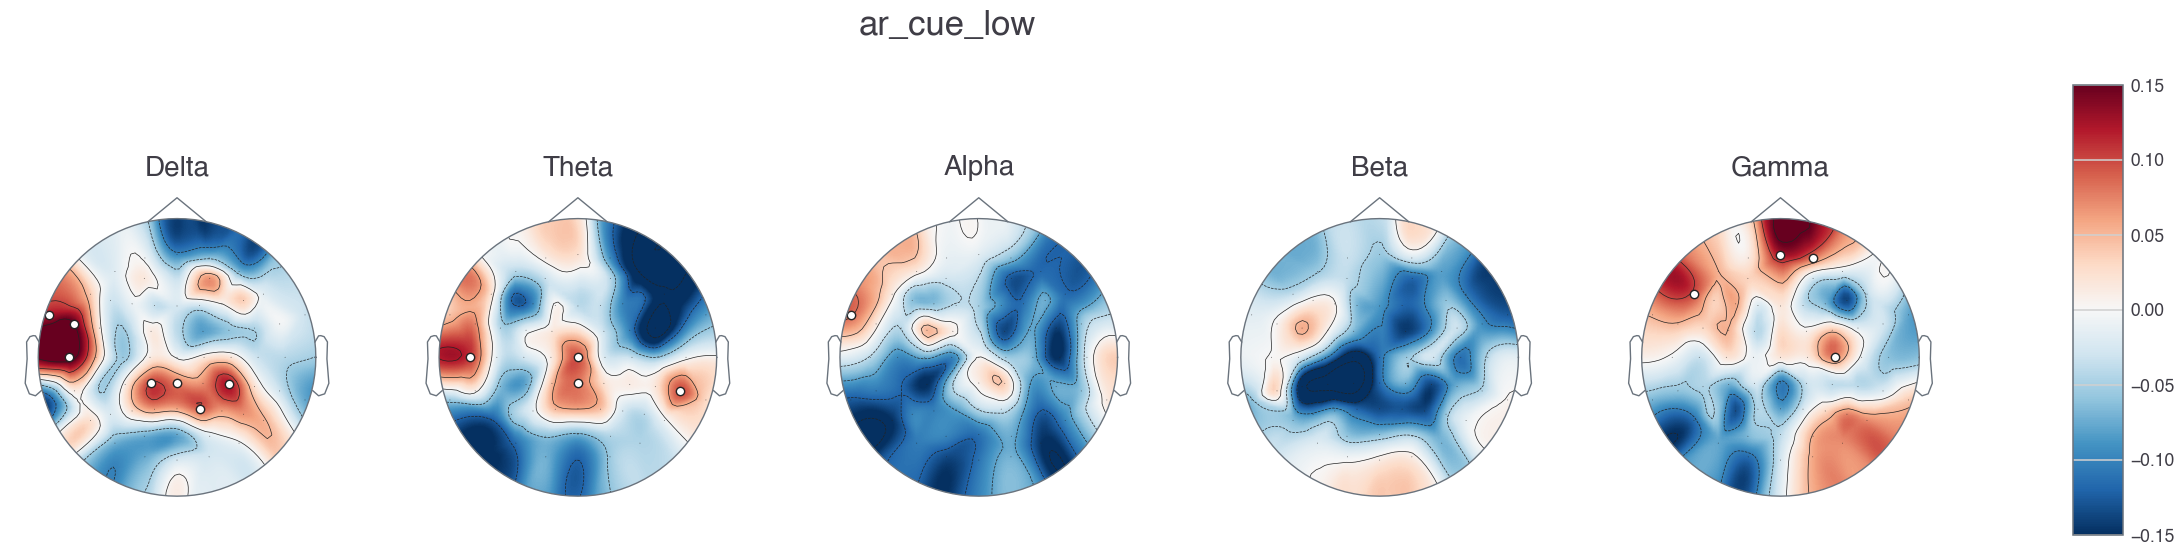

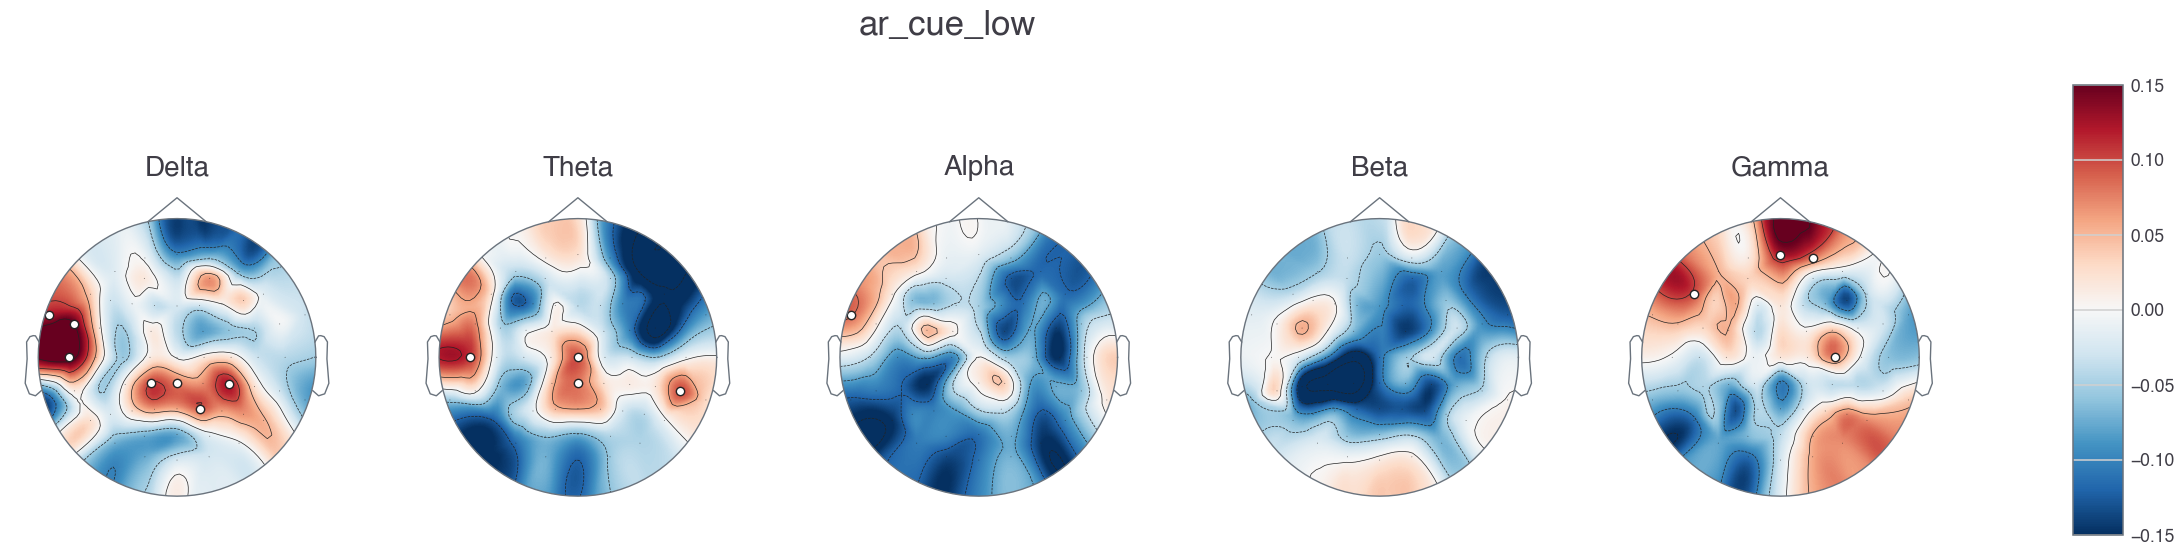

In [25]:
ar_cue_low = isrsa(ax_psd, behav_simi['ar_cue_low'], ch_names)
ar_cue_low.to_csv(os.path.join(results_path, 'ar_cue_low_isrsa.csv'))
isrsa_topo(ar_cue_low,topo_info,vmin=-0.15,vmax=0.15, title='ar_cue_low')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


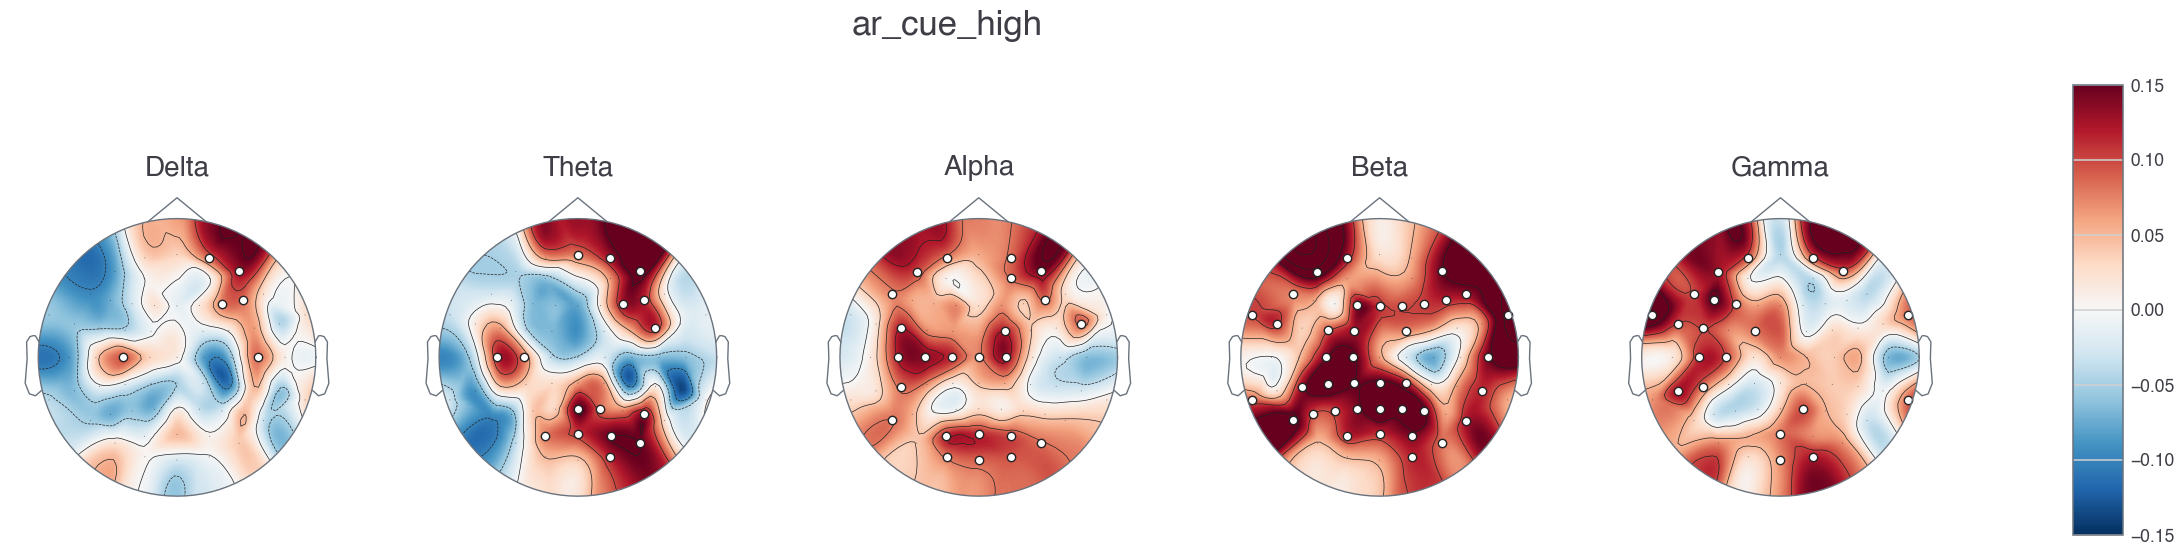

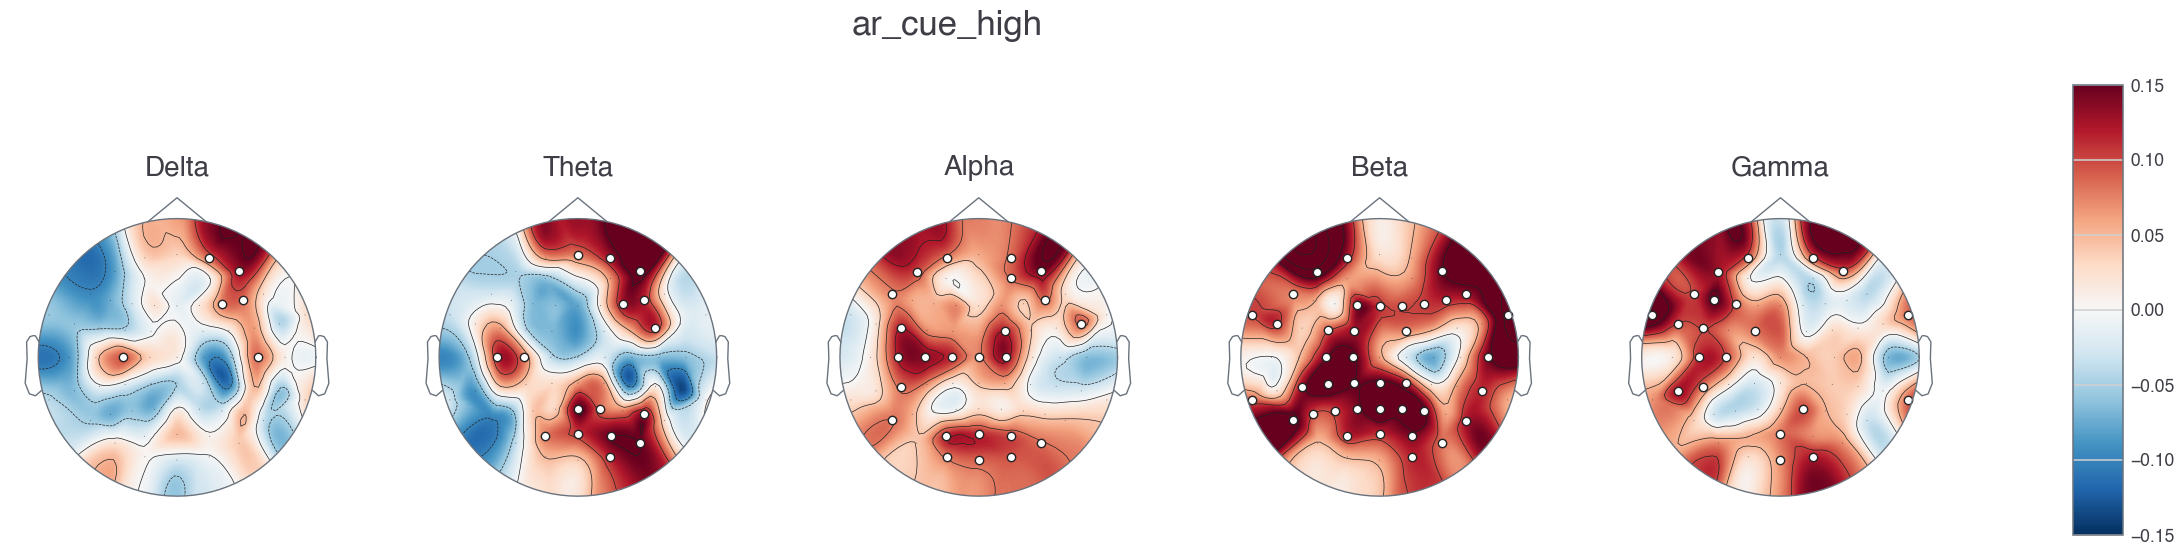

In [26]:
ar_cue_high = isrsa(ax_psd, behav_simi['ar_cue_high'], ch_names)
ar_cue_high.to_csv(os.path.join(results_path, 'ar_cue_high_isrsa.csv'))
isrsa_topo(ar_cue_high,topo_info,vmin=-0.15,vmax=0.15, title='ar_cue_high')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


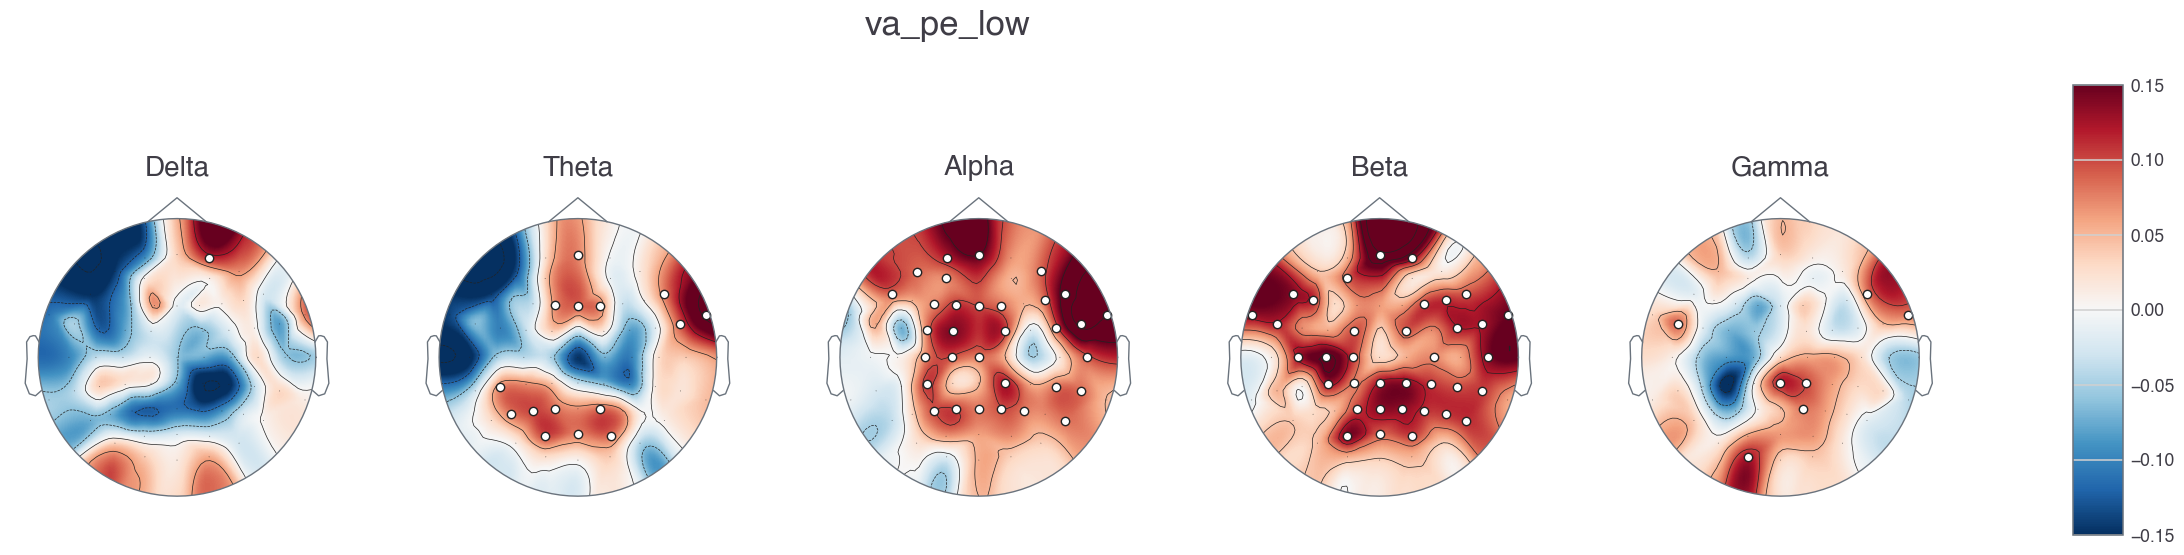

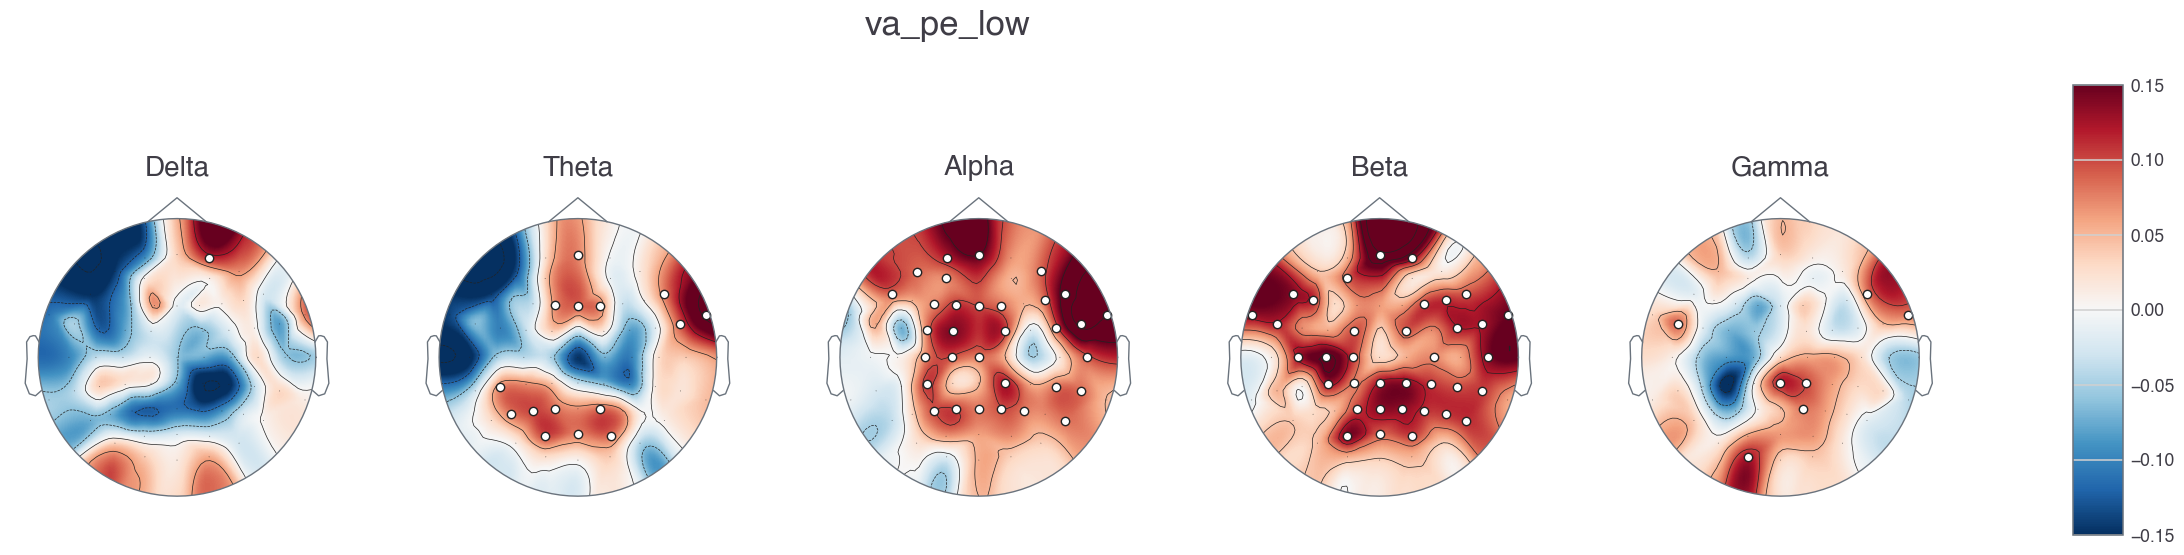

In [27]:
va_pe_low = isrsa(ax_psd, behav_simi['va_pe_low'], ch_names)
va_pe_low.to_csv(os.path.join(results_path, 'va_pe_low_isrsa.csv'))
isrsa_topo(va_pe_low,topo_info,vmin=-0.15,vmax=0.15, title='va_pe_low')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


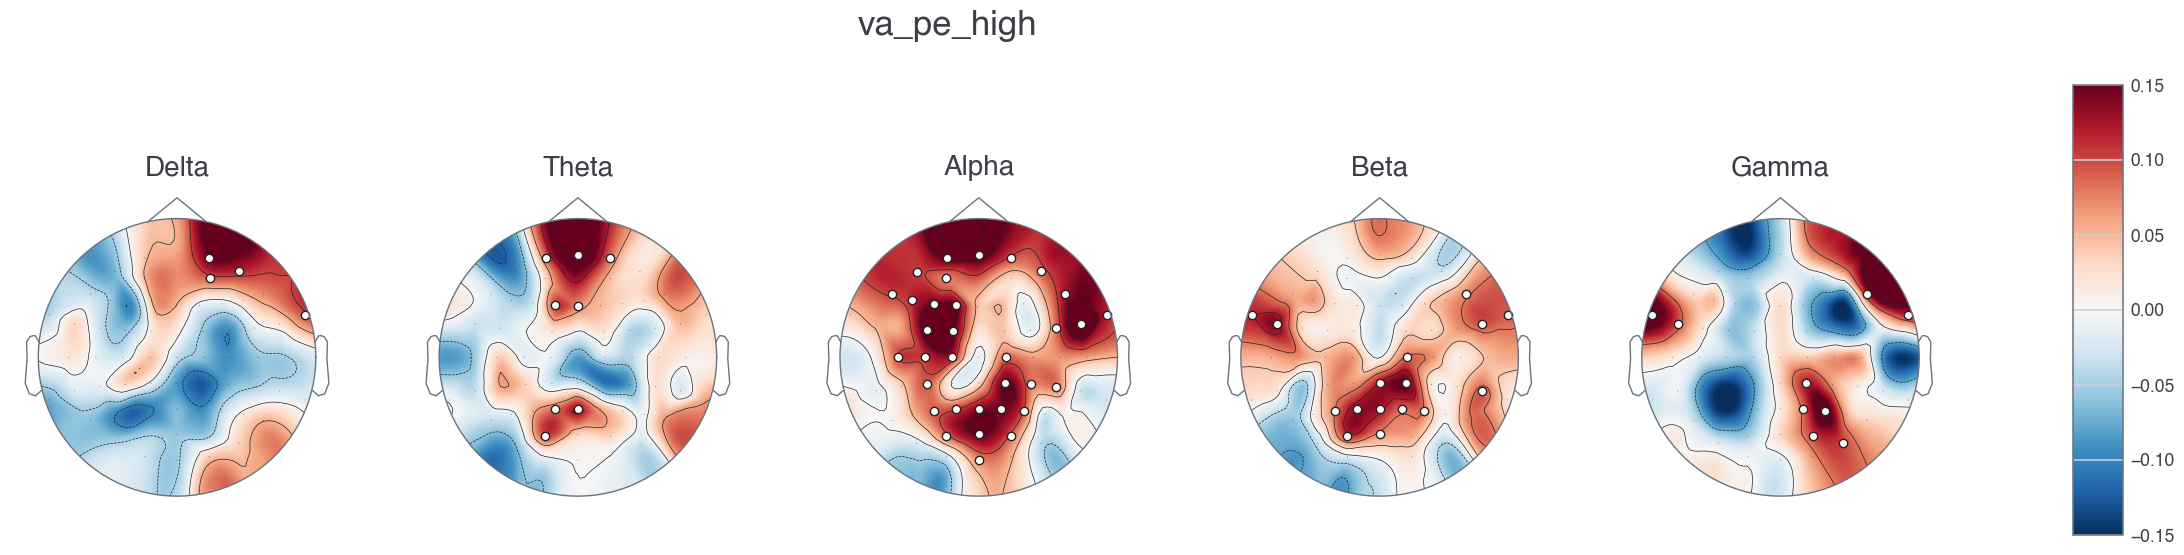

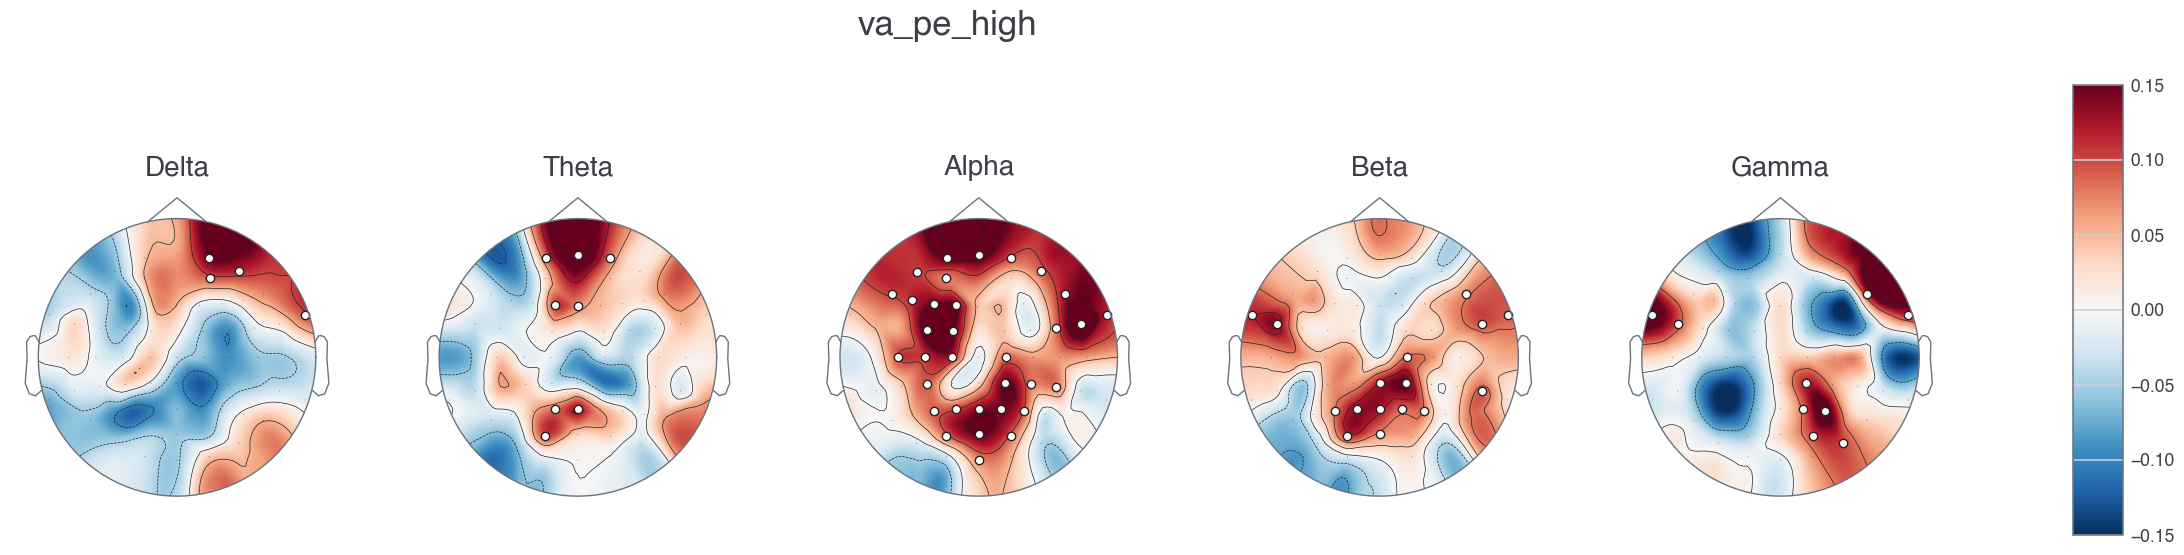

In [28]:
va_pe_high = isrsa(ax_psd, behav_simi['va_pe_high'], ch_names)
va_pe_high.to_csv(os.path.join(results_path, 'va_pe_high_isrsa.csv'))
isrsa_topo(va_pe_high,topo_info,vmin=-0.15,vmax=0.15, title='va_pe_high')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


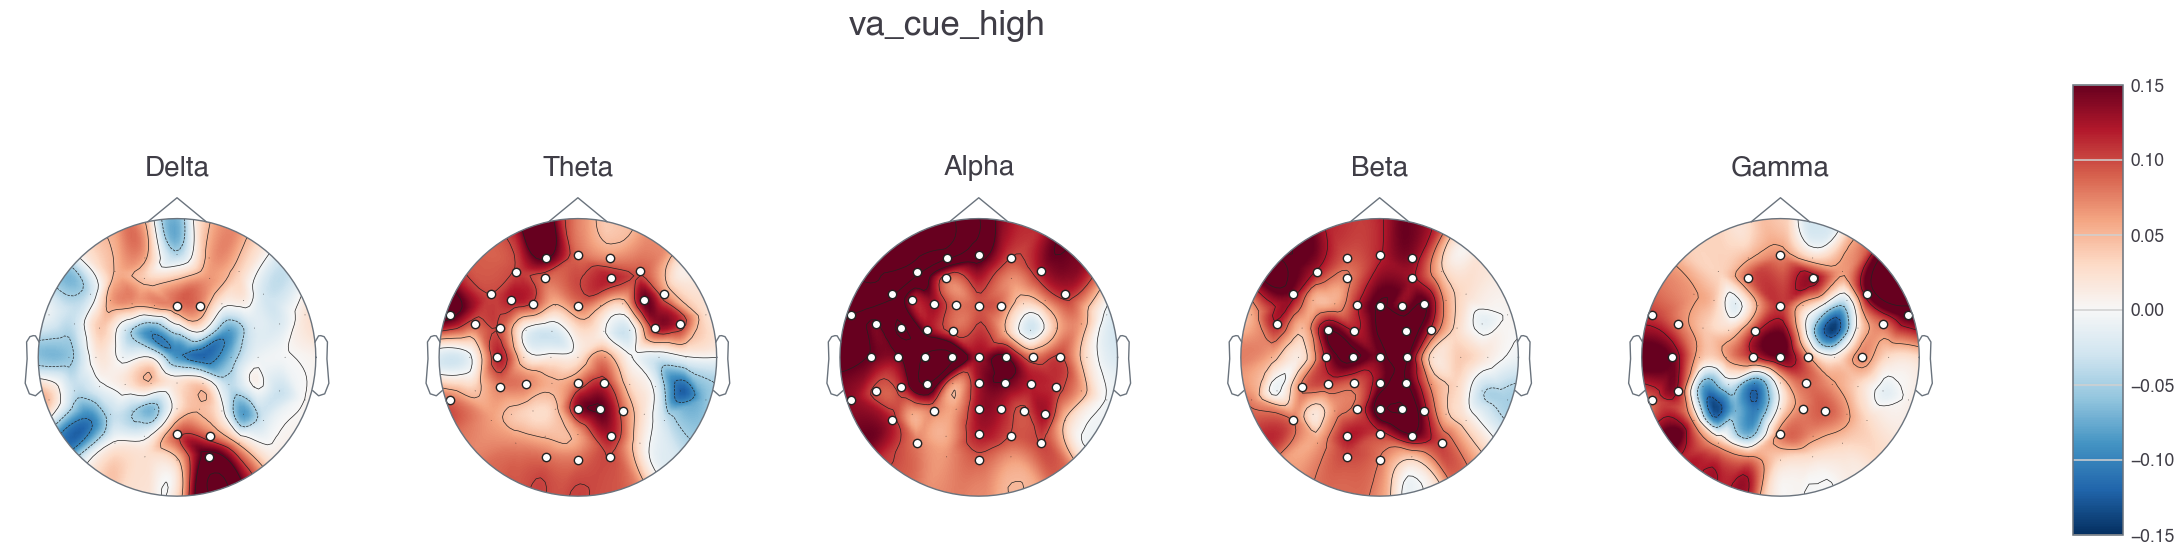

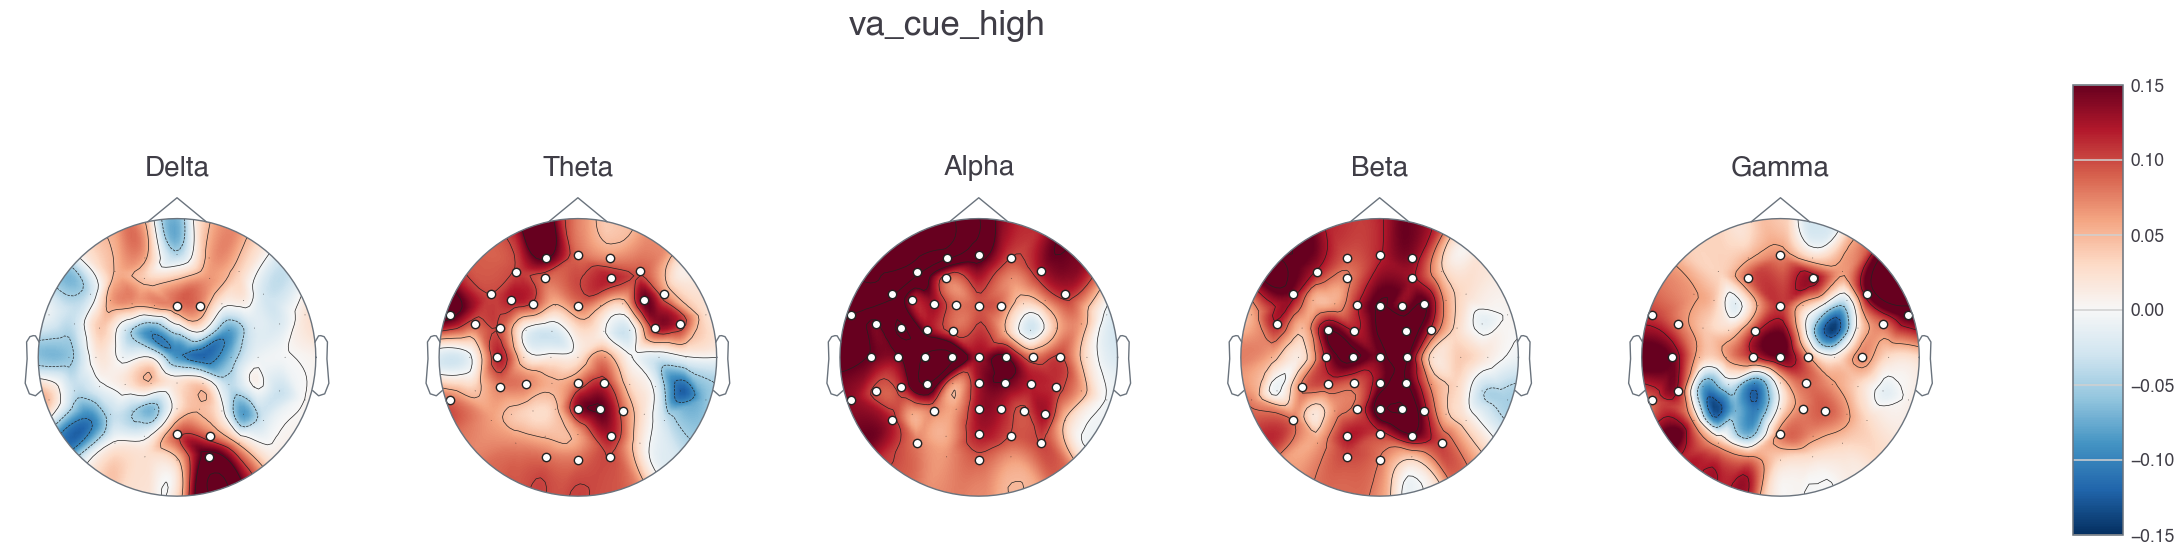

In [29]:
va_cue_high = isrsa(ax_psd, behav_simi['va_cue_high'], ch_names)
va_cue_high.to_csv(os.path.join(results_path, 'va_cue_high_isrsa.csv'))
isrsa_topo(va_cue_high,topo_info,vmin=-0.15,vmax=0.15, title='va_cue_high')

/var/folders/9v/hrxf86p91h31ptwdds0f77qw0000gn/T/ipykernel_22049/1321963811.py:32: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  isrsa_df = pd.DataFrame(isrsa_df, dtype='float64')


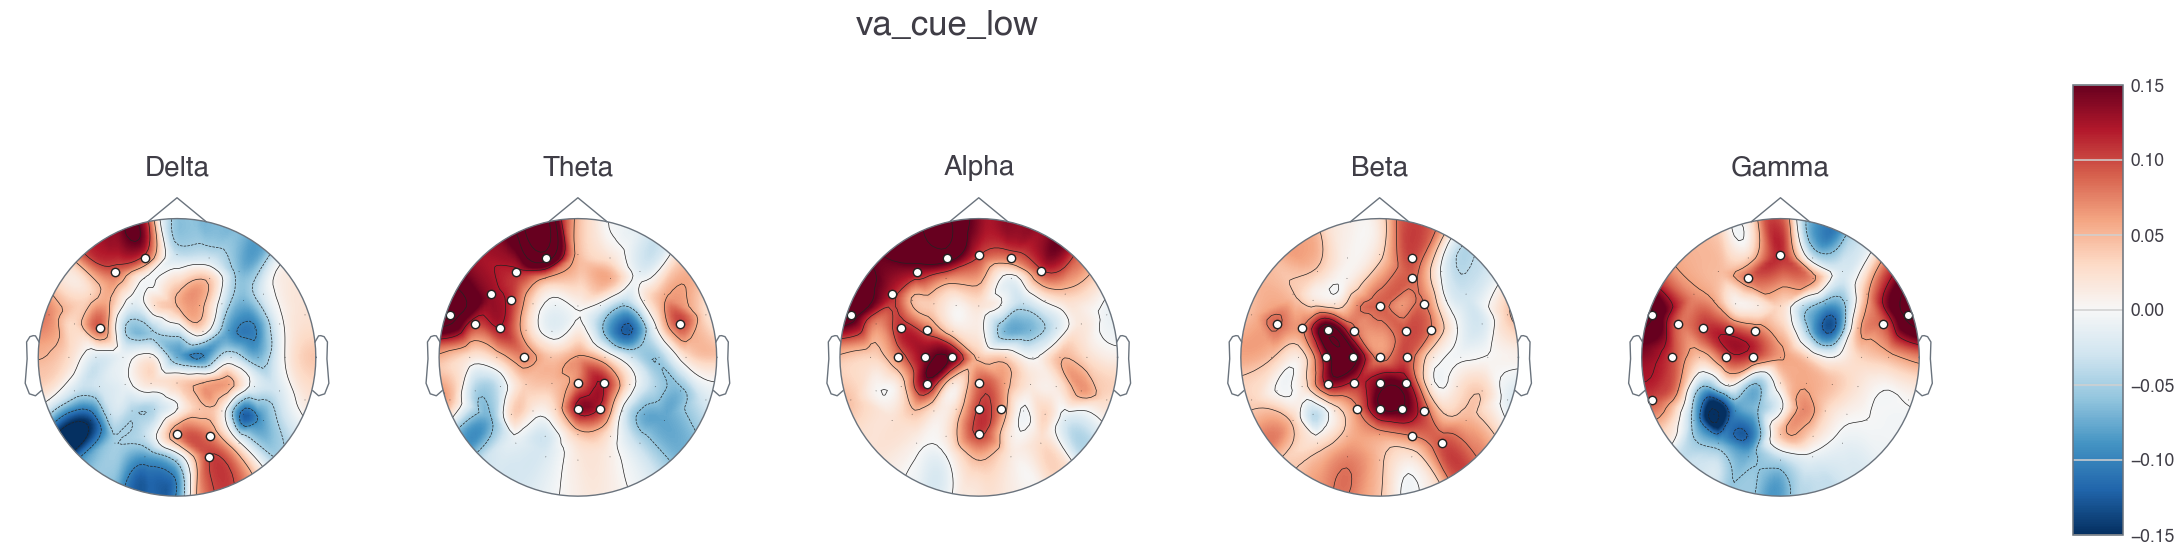

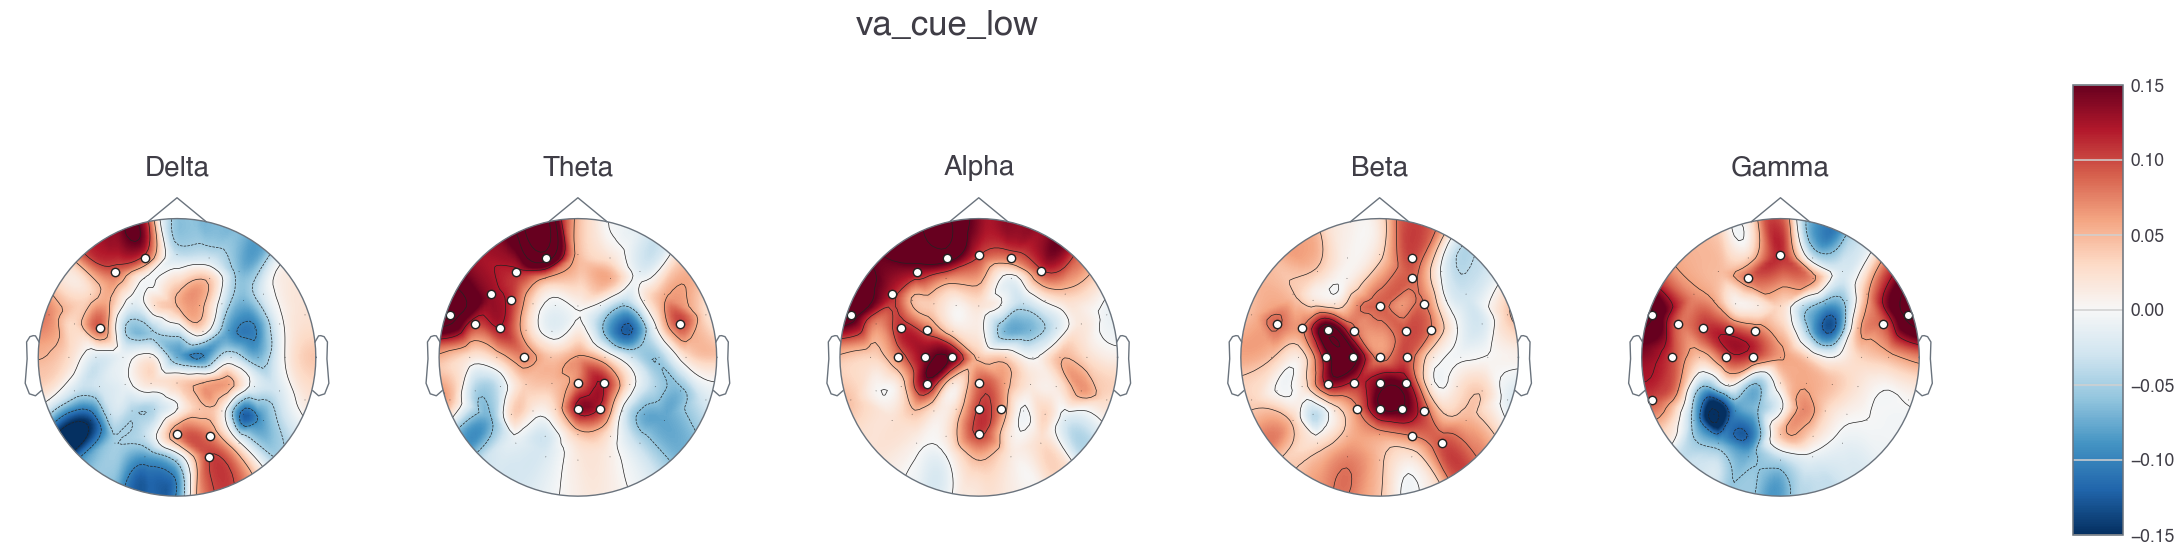

In [30]:
va_cue_low = isrsa(ax_psd, behav_simi['va_cue_low'], ch_names)
va_cue_low.to_csv(os.path.join(results_path, 'va_cue_low_isrsa.csv'))
isrsa_topo(va_cue_low,topo_info,vmin=-0.15,vmax=0.15, title='va_cue_low')

In [ ]:
##Corrected 